# Social Media Mining

### Social media mining is the process of obtaining big data from user-generated content on social media sites and mobile apps. Twitter is one of the social media platform in which volumouns amount of raw data can be find. To access twitter using python we have a package called tweepy. Tweepy is an open source Python package that is a convenient way to access the Twitter API with Python. Tweepy includes a set of classes and methods that represent Twitter's models and API endpoints, and it transparently handles various implementation details, such as: Data encoding and decoding.

##### Name: Akhila Priyanka Thirunagaru        ZID:Z1916001
##### Name: Sai Nikhil Medasani                ZID:Z1909575

### Installing required packages

In [1]:
pip install tweepy==3.10.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk

     |████████████████████████████████| 1.5 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 748 kB 62.3 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.4 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install diGraph

Note: you may need to restart the kernel to use updated packages.


##### We need to restart the kernel to use updated packages.

### Setting Up tweepy Authentication
##### to get the keys to connect to twitter, please refer the link below
##### https://cran.r-project.org/web/packages/rtweet/vignettes/auth.html

##### writing two classes that are used to stream live tweeets and saved these tweets in a "tweets.json" file.

In [1]:
import tweepy
import pandas as pd

# Loading Twitter Credentials

comsumerkey = 'HaGi9qZhzwYi6WWjshWWNnNI0'
consumersecret = '0UONUhYtw6Wuv1D15iWAhm5fl0wIbzwQ0TpIkwcTG4oqXVgya1'
accesstoken = '1453409856761782272-BxJo9LNBvOPobZITXHn2fzO5BP05TQ'
accesssecret = 'ZIJzx9naWg1D5e1RVUe6zv7Jt3GH099ufUtF04G2NKybj'

# Creating Authentication

from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

 
# # # # TWITTER STREAMER # # # #
class TwitterStreamer():
    """
    Class for streaming and processing live tweets.
    """
    def __init__(self):
        pass

    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        # This handles Twitter authetification and the connection to Twitter Streaming API
        listener = StdOutListener(fetched_tweets_filename)
        auth = OAuthHandler(comsumerkey, consumersecret)
        auth.set_access_token(accesstoken, accesssecret)
        stream = Stream(auth, listener)

        # This line filter Twitter Streams to capture data by the keywords: 
        stream.filter(track=hash_tag_list)


# # # # TWITTER STREAM LISTENER # # # #
class StdOutListener(StreamListener):
    """
    This is a basic listener that just prints received tweets to stdout.
    """
    def __init__(self, fetched_tweets_filename):
        self.fetched_tweets_filename = fetched_tweets_filename

    def on_data(self, data):
        try:
            print(data)
            with open(self.fetched_tweets_filename, 'a') as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print("Error on_data %s" % str(e))
        return True
          

    def on_error(self, status):
        print(status)

### Collecting Data on Keywords

##### streamlistener is called to extract the tweeets related to the keywords that are stored in first list. StreamListener is a real time data extractor API, so we have to stop it by generating an interupt.

In [2]:
if __name__ == '__main__':
 
    # Authenticate using config.py and connect to Twitter Streaming API.
    hash_tag_list = ["#python,#rstats"] # You can change keywords according to your research topic
    fetched_tweets_filename = "tweets.json"

    twitter_streamer = TwitterStreamer()
    twitter_streamer.stream_tweets(fetched_tweets_filename, hash_tag_list)

{"created_at":"Sat Oct 30 01:12:24 +0000 2021","id":1454254828075507714,"id_str":"1454254828075507714","text":"RT @BayeSniffer: #Bayesian | #API | #Flask | #Python | Check this out! We just had a visitor run our USDA Food Nutrients APP @ https:\/\/t.co\u2026","source":"\u003ca href=\"https:\/\/help.twitter.com\/en\/using-twitter\/how-to-tweet#source-labels\" rel=\"nofollow\"\u003emanzu\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2467565462,"id_str":"2467565462","name":"Gerald Manzu","screen_name":"Mansuk_Lo_Rume","location":"\ud83c\uddef\ud83c\uddf5\u6771\u4eac\u90fd\u8abf\u5e03\u5e02","url":"https:\/\/manzugerald.com","description":"Pythonista\u3002Sometimes a Bot\u2796Sometimes a Human\u2796Many a times, both. Alumnus\u062c\u0627\u0645\u0639\u0629 \u062c\u0648\u0628\u0627 University of Juba. \u4f4f\u3080\u3088\u308a\u697d\u3057\u308

KeyboardInterrupt: 

### Loading and Accesing Tweets

##### printing the extracted data

In [3]:
import json

posts = []
for line in open('tweets.json', 'r'):
    posts.append(json.loads(line))

posts

[{'created_at': 'Sat Oct 30 01:12:24 +0000 2021',
  'id': 1454254828075507714,
  'id_str': '1454254828075507714',
  'text': 'RT @BayeSniffer: #Bayesian | #API | #Flask | #Python | Check this out! We just had a visitor run our USDA Food Nutrients APP @ https://t.co…',
  'source': '<a href="https://help.twitter.com/en/using-twitter/how-to-tweet#source-labels" rel="nofollow">manzu</a>',
  'truncated': False,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 2467565462,
   'id_str': '2467565462',
   'name': 'Gerald Manzu',
   'screen_name': 'Mansuk_Lo_Rume',
   'location': '🇯🇵東京都調布市',
   'url': 'https://manzugerald.com',
   'description': 'Pythonista。Sometimes a Bot➖Sometimes a Human➖Many a times, both. Alumnusجامعة جوبا University of Juba. 住むより楽しむ Runs @junub_bot',
   'translator_type': 'none',
   'protected': False,
   'verified': False,
   'followers_

### Accessing User's Data

##### extracted data also contains information like user's id, name, screen name and location

In [4]:
users_id = [twt["user"]["id"] for twt in posts]
users_name = [twt["user"]["name"] for twt in posts]
users_screen_name = [twt["user"]["screen_name"] for twt in posts]
users_location = [twt["user"]["location"] for twt in posts]

print(users_id)
print(users_name)
print(users_screen_name)
print(users_location)

[2467565462, 1397984630385647621, 1448297335126204421, 1288754505211883521, 1131854274223366144, 1259375687934390272, 1280935835789975553, 1448950105059598336, 1337430590241562626, 1174588704381386752, 1448297335126204421, 1280935835789975553, 1337430590241562626, 411419084, 1448950105059598336, 286254689, 770285228929712128, 1448950105059598336, 1337430590241562626, 1337430590241562626, 1280935835789975553, 2467565462, 411419084, 1371551211351121920, 1448950105059598336, 4863506745, 1051649960, 1051649960, 1051649960, 1051649960, 1051649960, 1051649960, 1051649960, 1051649960, 1051649960, 1051649960, 1051649960, 1051649960, 1051649960, 1051649960, 1051649960, 1051649960, 1051649960, 2785259025, 1229424723416797184, 1243665419501744133, 190179815, 1448950105059598336, 1382032616824651777, 1448950105059598336, 1337430590241562626, 3111536505, 1343372118, 1287419748628615170, 1448950105059598336, 1337430590241562626, 951690486917582850, 1337430590241562626, 1354047563280707586, 133035061

### Accessing Retweet Data

##### extracted data also contains information about the retweet which we are trying to access, since this is real time data there is no retweet created yet

In [5]:
retweeted_data = [i['retweeted_status']['text'] for i in posts if i["retweeted"]]
retweeted_screen_name = [i['retweeted_status']['screen_name'] for i in posts if i["retweeted"]]
print(retweeted_data)
print(retweeted_screen_name)

[]
[]


### Tweet Items and Flattening

##### Flattening tweets is acessing and storing information that is availble in sub parts of tweets.

In [6]:
flatten_tweet = []
for i in posts:
    if "retweeted_status" in i:
        if "extended_tweet" in i["retweeted_status"]:
            flatten_tweet.append(i["retweeted_status"]["extended_tweet"]['full_text'])

flatten_tweet

['A+guaranteed; Hundred points symbolDM US\n#essay\nJavascript\n#History\n#Lab Report\n#Chemistry\n#Music\n#maths\n#Biology\n#Exam pay\n#Onlineclasses\n#python\n#Programming\nNursing\npsychology\nStatistics\n#Computer science\nThesis\n#100DaysOfCode\n#economics\n#assignmentspay\n#homeworkslave',
 'Mais uma vaga quentinha!!! \nPR: 7565 \nLink: https://t.co/e6hHQCeCxt \n \n#backendbrvagas  #PJ #JavaScript #Python #Django #Java #Remoto #AWS #MongoDB #TypeScript #Redis #PostgreSQL #SQL #Apache #GraphQL #Scrum #Git #Jira #Rest #Linux #RabbitMQ #Docker',
 'Barometric Pressure Trend over Previous Three Hours in Wesley Chapel, NC #climatestationmallory #switchdoclabs #skyweather2 #raspberrypi #python #dash #pandas #plotly #apacheairflow #nodered #postgresql #wesleychapelnc https://t.co/RjH1p1jlpu',
 '#AI #Linux #Algorithm #programmers #programming #DEVCommunity #programmer #CodeNewbies #coder #webdevelopers #100DaysOfCode #Python #Java #PHP #javascript #Coding #code #Blockchain #DataScience #c

### Tweet Flattening Function

##### function to flatten retweets and quoted data

In [7]:
def flatten_tweets(tweets):
    tweets_list = []
    
    # Iterate through each tweet
    for tweet_obj in tweets:
    
        tweet_obj['user-screen_name'] = tweet_obj["user"]["screen_name"]
    
        if 'extended_tweet' in tweet_obj:
            tweet_obj['extended_tweet-full_text'] = tweet_obj["extended_tweet"]["full_text"]
    
        if 'retweeted_status' in tweet_obj:
            tweet_obj['retweeted_status-user-screen_name'] = tweet_obj["retweeted_status"]["user"]["screen_name"]
            tweet_obj['retweeted_status-text'] = tweet_obj["retweeted_status"]["text"]

        if "quoted_status" in tweet_obj:
            tweet_obj["quoted_status-text"] = tweet_obj["quoted_status"]["text"]
            tweet_obj["quoted_status-user-name"] = tweet_obj["quoted_status"]["user"]["name"]

        tweets_list.append(tweet_obj)
    return tweets_list

flatted_tweets = flatten_tweets(posts)
flatted_tweets

[{'created_at': 'Sat Oct 30 01:12:24 +0000 2021',
  'id': 1454254828075507714,
  'id_str': '1454254828075507714',
  'text': 'RT @BayeSniffer: #Bayesian | #API | #Flask | #Python | Check this out! We just had a visitor run our USDA Food Nutrients APP @ https://t.co…',
  'source': '<a href="https://help.twitter.com/en/using-twitter/how-to-tweet#source-labels" rel="nofollow">manzu</a>',
  'truncated': False,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 2467565462,
   'id_str': '2467565462',
   'name': 'Gerald Manzu',
   'screen_name': 'Mansuk_Lo_Rume',
   'location': '🇯🇵東京都調布市',
   'url': 'https://manzugerald.com',
   'description': 'Pythonista。Sometimes a Bot➖Sometimes a Human➖Many a times, both. Alumnusجامعة جوبا University of Juba. 住むより楽しむ Runs @junub_bot',
   'translator_type': 'none',
   'protected': False,
   'verified': False,
   'followers_

### Loading tweets into a DataFrame

##### for easier and faster access we are converting flatted_tweets to dataframe.

In [8]:
import pandas as pd

df = pd.DataFrame(flatted_tweets)
df.head()

created_at                   id               id_str  \
0  Sat Oct 30 01:12:24 +0000 2021  1454254828075507714  1454254828075507714   
1  Sat Oct 30 01:12:29 +0000 2021  1454254848422121474  1454254848422121474   
2  Sat Oct 30 01:12:35 +0000 2021  1454254874313515009  1454254874313515009   
3  Sat Oct 30 01:13:00 +0000 2021  1454254979506655236  1454254979506655236   
4  Sat Oct 30 01:13:01 +0000 2021  1454254985148092420  1454254985148092420   

                                                text  \
0  RT @BayeSniffer: #Bayesian | #API | #Flask | #...   
1  RT @Savvy_Cliff: A+guaranteed; Hundred points ...   
2  RT @backendbrvagas: Mais uma vaga quentinha!!!...   
3  RT @ClimateMallory: Barometric Pressure Trend ...   
4  RT @agospameand: #AI #Linux #Algorithm #progra...   

                                              source  truncated  \
0  <a href="https://help.twitter.com/en/using-twi...      False   
1  <a href="https://help.twitter.com/en/using-twi...      False   
2  <a href="https://help.twitter.com/en/using-twi...      False   
3  <a href="https://github.com/lina2497" rel="nof...      False   
4  <a href="https://abdirahiimyassin.weebly.com" ...      False   

   in_reply_to_status_id in_reply_to_status_id_str  in_reply_to_user_id  \
0                    NaN                      None                  NaN   
1                    NaN                      None                  NaN   
2                    NaN                      None                  NaN   
3                    NaN                      None                  NaN   
4                    NaN                      None                  NaN   

  in_reply_to_user_id_str  ... extended_tweet extended_tweet-full_text  \
0                    None  ...            NaN                      NaN   
1                    None  ...            NaN                      NaN   
2                    None  ...            NaN                      NaN   
3                    None  ...            NaN                      NaN   
4                    None  ...            NaN                      NaN   

  display_text_range quoted_status_id quoted_status_id_str quoted_status  \
0                NaN              NaN                  NaN           NaN   
1                NaN              NaN                  NaN           NaN   
2                NaN              NaN                  NaN           NaN   
3                NaN              NaN                  NaN           NaN   
4                NaN              NaN                  NaN           NaN   

  quoted_status_permalink  quoted_status-text  quoted_status-user-name  \
0                     NaN                 NaN                      NaN   
1                     NaN                 NaN                      NaN   
2                     NaN                 NaN                      NaN   
3                     NaN                 NaN                      NaN   
4                     NaN                 NaN                      NaN   

   extended_entities  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 42 columns]

### Finding Keyword

##### calculating how many time the keyword python is present in our dataframe using np.sum()

In [9]:
import numpy as np

keyword = "python"
np.sum(df.text.str.contains(keyword, case=False))

80

### Keyword in all other Places

In [10]:
count = 0
for i in ["text", "extended_tweet-full_text", "retweeted_status-text"]:
    count += np.sum(df[i].str.contains(keyword, case=False))
    print(i+":"+str(count))

text:80
extended_tweet-full_text:92
retweeted_status-text:161


In [11]:
def check_word_in_tweet(word, data):
    contains_column = data['text'].str.contains(word, case = False)
    contains_column |= data['extended_tweet-full_text'].str.contains(word, case = False)
    contains_column |= data["retweeted_status-text"].str.contains(word, case = False)
    return contains_column

check_word_in_tweet(keyword, df)

0       True
1      False
2       True
3      False
4      False
       ...  
187    False
188    False
189     True
190    False
191     True
Name: text, Length: 192, dtype: bool

### Comparing #python & #rstats

##### calculating the proportions of both the words

In [12]:
python = check_word_in_tweet("#python", df)

rstats = check_word_in_tweet("#rstats", df)

# Print proportion of tweets mentioning #python
print("Proportion of #python tweets:", np.sum(python) / df.shape[0])

# Print proportion of tweets mentioning #rstats
print("Proportion of #rstats tweets:", np.sum(rstats) / df.shape[0])

Proportion of #python tweets: 0.3802083333333333
Proportion of #rstats tweets: 0.09895833333333333


### Creating Time Series Data Frame & Generating Mean Frequency

##### Generating time series is to manage a datafrmae to see time wise that a specific keyword comes in the text or not. 
##### for example I extracted 20 tweeets in 1 mintue and how many times a spcific words come in these tweests.

In [13]:
python = pd.DataFrame()
python["time"] = pd.to_datetime(df.created_at)
python["Python_Present"] = check_word_in_tweet("Python", df)
python["Program_Present"]= check_word_in_tweet("Program", df)
python.set_index("time", inplace=True)
python_mean = python.Python_Present.resample("1 min").mean()
program_mean = python.Program_Present.resample("1 min").mean()

### PLotting Mean Frequency

##### plotted frequecy for words python and program.

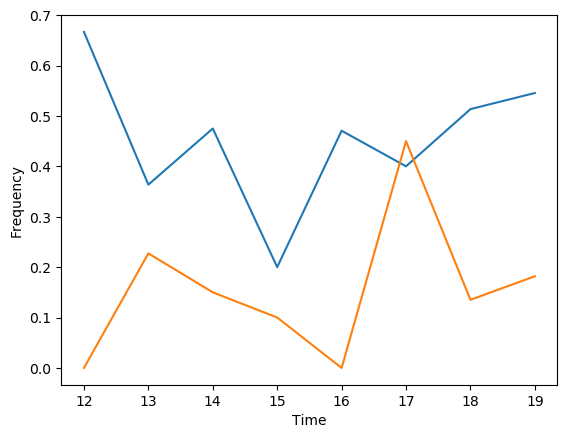

In [14]:
import matplotlib.pyplot as plt
plt.plot(python_mean.index.minute, python_mean)
plt.plot(program_mean.index.minute, program_mean)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

### Loading VADER & Calculating Sentiment Scores

##### Vader is loaded to calculate the polarity score for text. Polarity  determines if the text expresses the positive, negative or neutral sentiment of the user about the entity in consideration. 

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download("vader_lexicon")

analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
df["sent_score"] = df.text.apply(analyzer.polarity_scores)
df.sent_score

0      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3      {'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'comp...
4      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                             ...                        
187    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
188    {'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'comp...
189    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
190    {'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'comp...
191    {'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'comp...
Name: sent_score, Length: 192, dtype: object

In [18]:
sentiment = df.sent_score.apply(lambda x: x["compound"])

### Plotting Sentiment Score

##### plotted the sentiment score on the graph using matplotlib library.

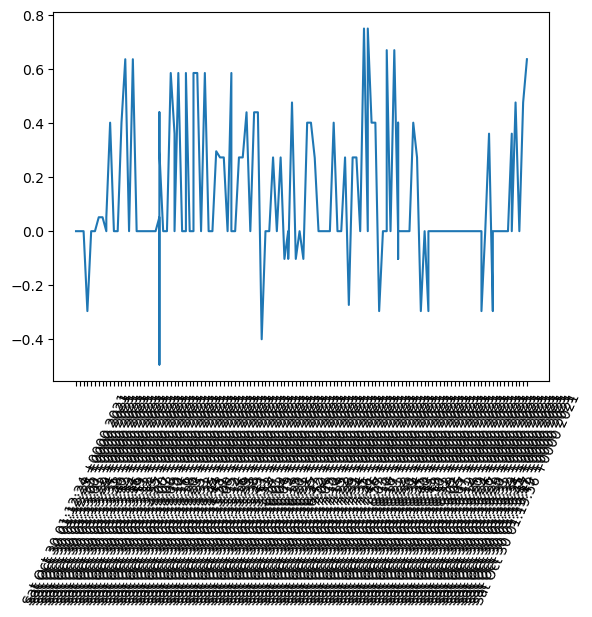

In [20]:
plt.xticks(rotation=65)
plt.plot(df.created_at, sentiment)
plt.show()

### Creating Retweet

##### Retweet network is a directed weighted graph, where nodes represent Twitter users and edges represent the retweet relation.

In [21]:
import networkx as nx

G_rt = nx.from_pandas_edgelist(
    df,
    source = "user-screen_name",
    target = "retweeted_status-user-screen_name",
    create_using = nx.DiGraph())

print('Nodes in RT network:', len(G_rt.nodes()))

print('Edges in RT network:', len(G_rt.edges()))

Nodes in RT network: 99
Edges in RT network: 158


### Creating Reply Network

##### Reply network is calculated similary as retweet network

In [22]:
df.fillna(np.nan, inplace=True)
G_reply = nx.from_pandas_edgelist(
    df,
    source = "user-screen_name",
    target = "in_reply_to_screen_name",
    create_using = nx.DiGraph())

print('Nodes in RT network:', len(G_rt.nodes()))

print('Edges in RT network:', len(G_rt.edges()))

Nodes in RT network: 99
Edges in RT network: 158


### Visualizing retweet Network

##### Plotted the directed graph that we have calculated for retwees.

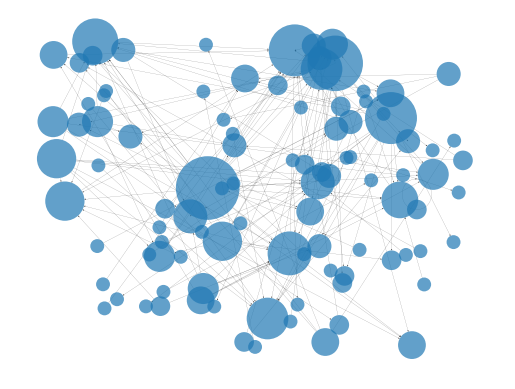

In [23]:
pos = nx.random_layout(G_rt)

# Create size list
sizes = [x[1]*100 for x in G_rt.degree()]

# Draw the network
nx.draw_networkx(G_rt, pos, 
    with_labels = False, 
    node_size = sizes,
    width = 0.1, alpha = 0.7,
    arrowsize = 2, linewidths = 0)

# Turn axis off and show
plt.axis('off'); 
plt.show()

### In-Degree Certanality

##### In-degree centrality measures the number of edges other nodes have initiated with a vertex. 
##### Example: Here we calculated in-degree centrality for both retweets and replies and then sorted and printed them

In [24]:
# Generate in-degree centrality for retweets 
rt_centrality = nx.in_degree_centrality(G_rt)
reply_centrality = nx.in_degree_centrality(G_reply)

column_names = ['screen_name', 'degree']
rt_in = pd.DataFrame(list(G_rt.in_degree()), columns = column_names)
reply_in = pd.DataFrame(list(G_reply.in_degree()), columns = column_names)

print(rt_in.sort_values('degree', ascending = False).head())
print(reply_in.sort_values('degree', ascending = False).head())

      screen_name  degree
17            NaN      14
50  JobPreference      10
11  jackiemorelli       9
85       Sheraj99       9
35    glitchbotio       8
       screen_name  degree
1              NaN      64
52  robertodepinho       1
21     thosjleeper       1
43      appthisway       0
47         byLilyV       0


### Betweenness Certanaility

##### Betweenness centrality is a measure of centrality in a graph based on shortest paths. 

In [25]:
rt_centrality = nx.betweenness_centrality(G_rt)
reply_centrality = nx.betweenness_centrality(G_reply)

column_names = ['screen_name', 'betweenness_centrality']
rt = pd.DataFrame(list(rt_centrality.items()), columns = column_names)
reply = pd.DataFrame(list(reply_centrality.items()), columns = column_names)

print(rt.sort_values('betweenness_centrality', ascending = False).head())
print(reply.sort_values('betweenness_centrality', ascending = False).head())

      screen_name  betweenness_centrality
50  JobPreference                0.000375
35    glitchbotio                0.000366
63  tutorsglobe86                0.000337
21       toudajew                0.000324
85       Sheraj99                0.000323
        screen_name  betweenness_centrality
0    Mansuk_Lo_Rume                     0.0
50       pythonbot_                     0.0
36   TheCuriousLuke                     0.0
37     BenjaminFrfr                     0.0
38  realrubberduck1                     0.0


### Ratios

##### ratio of centrality of retweets and replies.

In [26]:
ratio = rt_in.merge(reply_in, on = 'screen_name', suffixes = ('_rt', '_reply'))

ratio['ratio'] = ratio["degree_reply"] / ratio["degree_rt"]
ratio = ratio[ratio['degree_rt'] >= 5]
print(ratio.sort_values('ratio', ascending = False).head())

      screen_name  degree_rt  degree_reply     ratio
10            NaN         14            64  4.571429
13       toudajew          6             0  0.000000
19    glitchbotio          8             0  0.000000
32  JobPreference         10             0  0.000000
41  tutorsglobe86          7             0  0.000000


### Accessing user-defined location

##### Twitter data also contains the user's geo data.

In [28]:
print(posts[0]['user']["location"])

# Flatten and load the SOTU tweets into a dataframe
tweets_sotu = pd.DataFrame(flatted_tweets)
tweets_sotu.head(3)

🇯🇵東京都調布市


created_at                   id               id_str  \
0  Sat Oct 30 01:12:24 +0000 2021  1454254828075507714  1454254828075507714   
1  Sat Oct 30 01:12:29 +0000 2021  1454254848422121474  1454254848422121474   
2  Sat Oct 30 01:12:35 +0000 2021  1454254874313515009  1454254874313515009   

                                                text  \
0  RT @BayeSniffer: #Bayesian | #API | #Flask | #...   
1  RT @Savvy_Cliff: A+guaranteed; Hundred points ...   
2  RT @backendbrvagas: Mais uma vaga quentinha!!!...   

                                              source  truncated  \
0  <a href="https://help.twitter.com/en/using-twi...      False   
1  <a href="https://help.twitter.com/en/using-twi...      False   
2  <a href="https://help.twitter.com/en/using-twi...      False   

   in_reply_to_status_id in_reply_to_status_id_str  in_reply_to_user_id  \
0                    NaN                      None                  NaN   
1                    NaN                      None                  NaN   
2                    NaN                      None                  NaN   

  in_reply_to_user_id_str  ... extended_tweet extended_tweet-full_text  \
0                    None  ...            NaN                      NaN   
1                    None  ...            NaN                      NaN   
2                    None  ...            NaN                      NaN   

  display_text_range quoted_status_id quoted_status_id_str quoted_status  \
0                NaN              NaN                  NaN           NaN   
1                NaN              NaN                  NaN           NaN   
2                NaN              NaN                  NaN           NaN   

  quoted_status_permalink  quoted_status-text  quoted_status-user-name  \
0                     NaN                 NaN                      NaN   
1                     NaN                 NaN                      NaN   
2                     NaN                 NaN                      NaN   

   extended_entities  
0                NaN  
1                NaN  
2                NaN  

[3 rows x 42 columns]

### Accessing Bounding Box

##### we tried the get the coordinates for the users. But as most of the users are not verified so their locations are not present here.

In [29]:
tweets_sotu.place.fillna(np.nan, inplace=True)

def getBoundingBox(place):
    if type(place) == dict:
        return place["bounding_box"]["coordinates"]

bounding_boxes = tweets_sotu["place"].apply(getBoundingBox)

print(bounding_boxes)

0      None
1      None
2      None
3      None
4      None
       ... 
187    None
188    None
189    None
190    None
191    None
Name: place, Length: 192, dtype: object


### Calculate Centroids

##### We'll have 6 coordinates for each user if we have their geo location. We calculated the centers of longitude and latitude. 

In [30]:
def calculateCentroid(place):
    if type(place) == dict:
        coordinates = place["bounding_box"]["coordinates"][0]
          
        longs = np.unique( [x[0] for x in coordinates] )
        lats  = np.unique( [x[1] for x in coordinates] )

        if len(longs) == 1 and len(lats) == 1:
            return (longs[0], lats[0])
        elif len(longs) == 2 and len(lats) == 2:
            central_long = np.sum(longs) / 2
            central_lat  = np.sum(lats) / 2
        else:
            raise ValueError("Non-rectangular polygon not supported: %s" % 
              ",".join(map(lambda x: str(x), coordinates)) )

        return (central_long, central_lat)
        
centroids = tweets_sotu["place"].apply(calculateCentroid)
centroids

0      None
1      None
2      None
3      None
4      None
       ... 
187    None
188    None
189    None
190    None
191    None
Name: place, Length: 192, dtype: object